
Importing Dependencies



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [4]:
#loading the dataset to a Pandas Dataframe
wine_dataset = pd.read_csv('winequality-red.csv')


In [5]:
#number of rows & columns in the dataset
wine_dataset.shape

(1599, 12)

In [6]:
#first five rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data analysis and Visualizitaion

In [8]:
#statistical meausures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


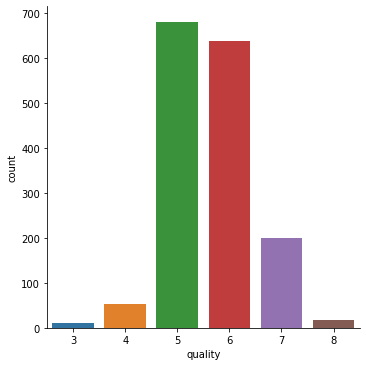

In [9]:
#number of values for each quality

sns.catplot(x='quality',data=wine_dataset,kind = 'count')

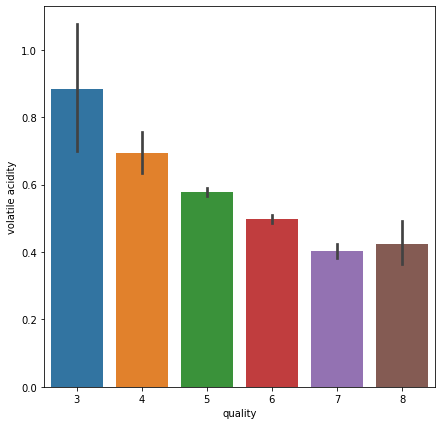

In [15]:
# volatile acidity vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

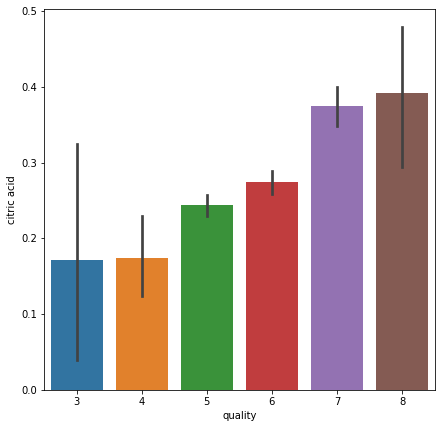

In [16]:
# citric acid vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

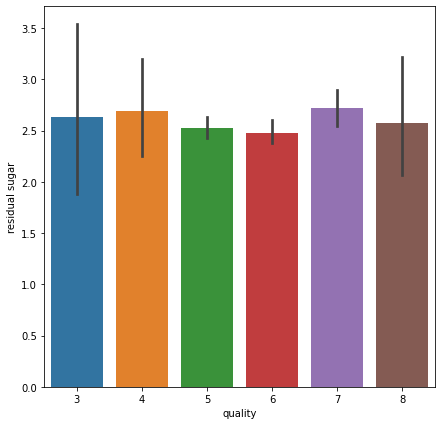

In [17]:
# residual sugar vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='residual sugar',data=wine_dataset)

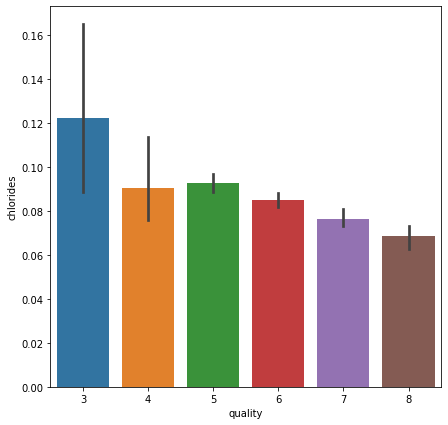

In [18]:
# chlorides vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='chlorides',data=wine_dataset)

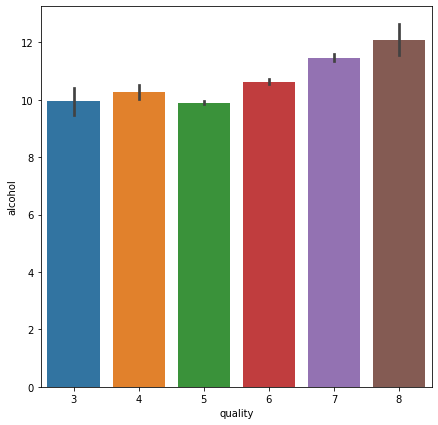

In [19]:
# alcohol vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='alcohol',data=wine_dataset)



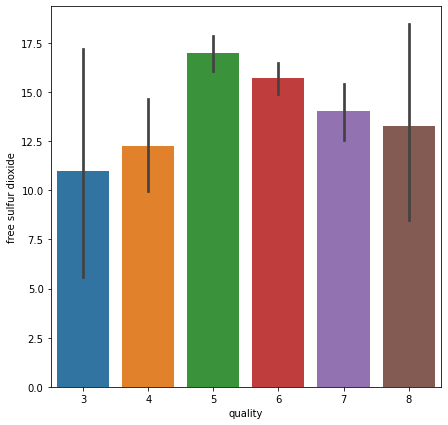

In [20]:
# free sulfur dioxide vs  Quality

plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality',y='free sulfur dioxide',data=wine_dataset)





Correlation

Positive Correlation

Negative Correlation

In [21]:
correlation  = wine_dataset.corr()

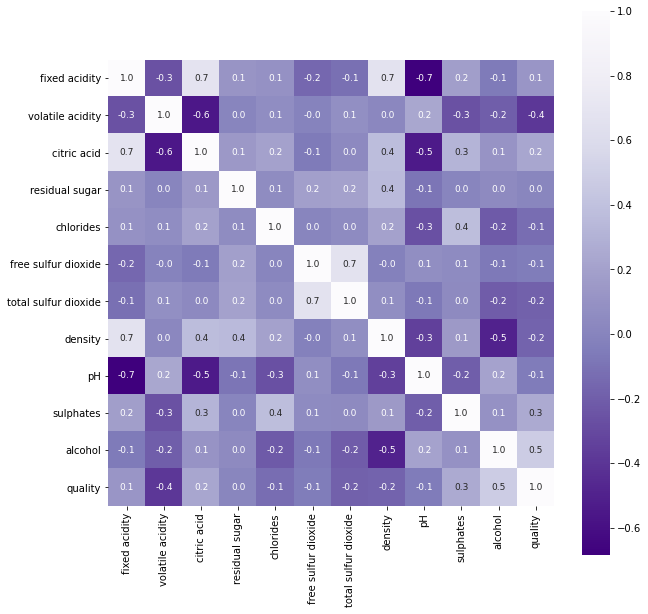

In [32]:
# constructing a heatmap to understand the correlation between columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':9}, cmap='Purples_r')

Data Preprocessing

In [34]:
#separete data and label

X= wine_dataset.drop('quality',axis=1)

print(X)


      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

In [35]:
#label binarization

Y = wine_dataset['quality'].apply(lambda y_value :1 if y_value >=7 else 0)

In [36]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Training and Testing Data Splitting

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [38]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


Model Training --> Random Forrest Classifier Model

In [39]:
model = RandomForestClassifier()

In [40]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model Evaluation
with

 accuracy score

In [41]:
  #accuracy on test data
  X_test_prediction = model.predict(X_test)
  test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
  print("Accuracy of the model is ",test_data_accuracy)

Accuracy of the model is  0.928125
